## **Importando os dados**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()

In [ ]:
# print(iris.target)
# print(iris.target_names)

In [ ]:
type(iris.data)

numpy.ndarray

In [ ]:
iris_x = pd.DataFrame(
    data=iris.data,
    columns=[
        "sepala_comprimento", "sepala_largura",
        "petala_comprimento", "petala_largura"])

iris_x

,sepala_comprimento,sepala_largura,petala_comprimento,petala_largura
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## **Segmentar a Amostra?**

In [ ]:
# from sklearn.model_selection import train_test_split
# treino_X, teste_X, treino_Y, teste_Y = train_test_split(
#    iris, test_size=0.3, random_state=4)

# Aprendizagem não-supervisionada (Sem treino)

## **Criando o Modelo Não Supervisionado**

### **KNN**

In [ ]:
from sklearn.neighbors import NearestNeighbors

#Criação do Modelo
model = NearestNeighbors(n_neighbors=3, algorithm='auto') #default 5 grupos
# ['auto', 'ball_tree', 'tmokd_tree', 'brute'] - auto ele escolhe o melhor algoritmo

#Identificação dos grupos
model.fit(iris_x)


NearestNeighbors(n_neighbors=3)

In [ ]:
distances, indices = model.kneighbors(iris_x)

# print(indices)
print(distances)

[[0.         0.1        0.14142136]
 [0.         0.14142136 0.14142136]
 [0.         0.14142136 0.24494897]
 [0.         0.14142136 0.17320508]
 [0.         0.14142136 0.14142136]
 [0.         0.33166248 0.34641016]
 [0.         0.2236068  0.26457513]
 [0.         0.1        0.14142136]
 [0.         0.14142136 0.3       ]
 [0.         0.1        0.17320508]
 [0.         0.1        0.28284271]
 [0.         0.2236068  0.2236068 ]
 [0.         0.14142136 0.17320508]
 [0.         0.24494897 0.31622777]
 [0.         0.41231056 0.46904158]
 [0.         0.36055513 0.54772256]
 [0.         0.34641016 0.36055513]
 [0.         0.1        0.14142136]
 [0.         0.33166248 0.38729833]
 [0.         0.14142136 0.14142136]
 [0.         0.28284271 0.3       ]
 [0.         0.14142136 0.24494897]
 [0.         0.45825757 0.50990195]
 [0.         0.2        0.26457513]
 [0.         0.3        0.37416574]
 [0.         0.17320508 0.2       ]
 [0.         0.2        0.2236068 ]
 [0.         0.14142136 0.14

In [ ]:
model.kneighbors_graph(iris_x).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## KMeans

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_x)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## **Definir o melhor valor para K**

### **Técnica do Joelho ou do Cotovelo (Knee or Elbow)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

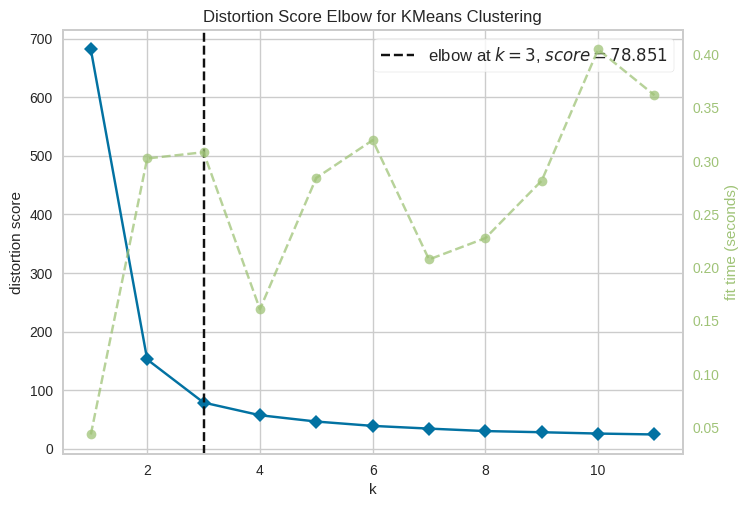

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_G = KMeans()
visualizer = KElbowVisualizer(model_G, k=(1,12))

visualizer.fit(iris_x)
visualizer.show()

## **Visualização dos grupos**

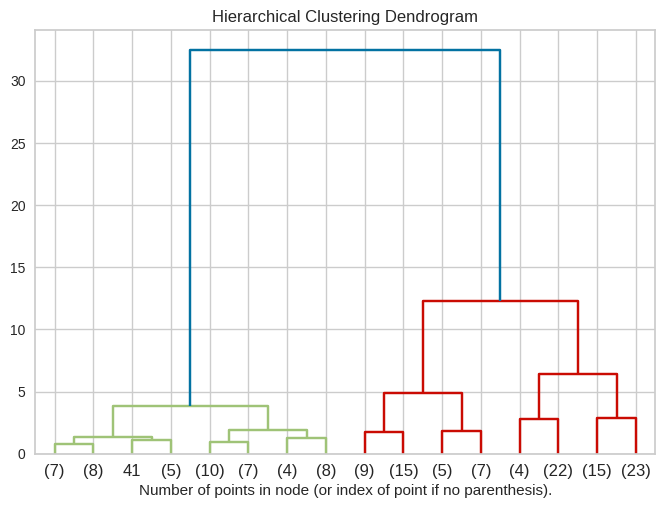

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

iris_x = pd.DataFrame(
    data=iris.data,
    columns=[
             "sepala_comprimento", "sepala_largura",
             "petala_comprimento", "petala_largura"])

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
modelAg = AgglomerativeClustering(
    distance_threshold=5, n_clusters=None)

modelAg = modelAg.fit(iris_x)
plt.title('Hierarchical Clustering Dendrogram')

# plot the top three levels of the dendrogram
plot_dendrogram(modelAg, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
modelAg.n_clusters_

4

In [ ]:
modelAg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])